In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('ev_sales.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,vehicle type,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,BUS,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431
5,FORK LIFT,30,0.026516,Gujarat,27,213936
6,GOODS CARRIER,62,0.054800,Tamil Nadu,212,213396
7,LUXURY CAB,11,0.009723,West Bengal,22,121463
8,MAXI CAB,1,0.000884,Haryana,55,247628
9,M-CYCLE/SCOOTER,42461,37.529941,Maharashtra,317,202130


Target segment is M-CYCLE/SCOOTER 

In [140]:
#Data on Maharashtra population and min annual income pulled from the internet
population = 124862220
income_mean = df.iloc[9, 5]
income_min = 51111
#we can determine the max income by knowing the min income, mean income, population 
income_max = (2*income_mean-51111)
income_MH = np.linspace(income_min, income_max, population)

In [141]:
income_other = df['Average gross income ']
income_other.drop([9], axis=0, inplace= True)
income = [income_MH, income_other]

Assuming that number of EV Charging Stations accross Maharashtra varies roughly as with
10 stations corresponds to 10 big major cities,
7 stations in 20 semi-big cities,
5 stations in 13 medium sized cities,
1 station in 12 small cities

In [142]:
#Data on EV Charging Station in Maharashtra
ev_cities = 55
stations_total = df.iloc[9, 4]
stations_MH = [10*np.ones(10), 7*np.ones(20), 5*np.ones(13), np.ones(12)]

In [143]:
S = [10*np.ones(10), 7*np.ones(20), 5*np.ones(13), np.ones(12)]
stations_MH = []
for i in range(len(S)):
    for j in range(len(S[i])):
        stations_MH.append(S[i][j])
stations_MH = np.array(stations_MH)

In [144]:
stations_other = df['Public EV Charging Stations']
stations_other.drop([9], axis=0, inplace= True)
stations = [np.log(stations_MH), np.log(stations_other)]

/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_86219/181213414.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(labels=labels, Fontsize=16)
/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_86219/181213414.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_ylabel('Purchasing Power', FontSize =16)
/var/folders/4y/nn0fgj3n78gbhc8c7n171c340000gn/T/ipykernel_86219/181213414.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_ylabel('Public EV Charging Stations (log scale)', FontSize =16)


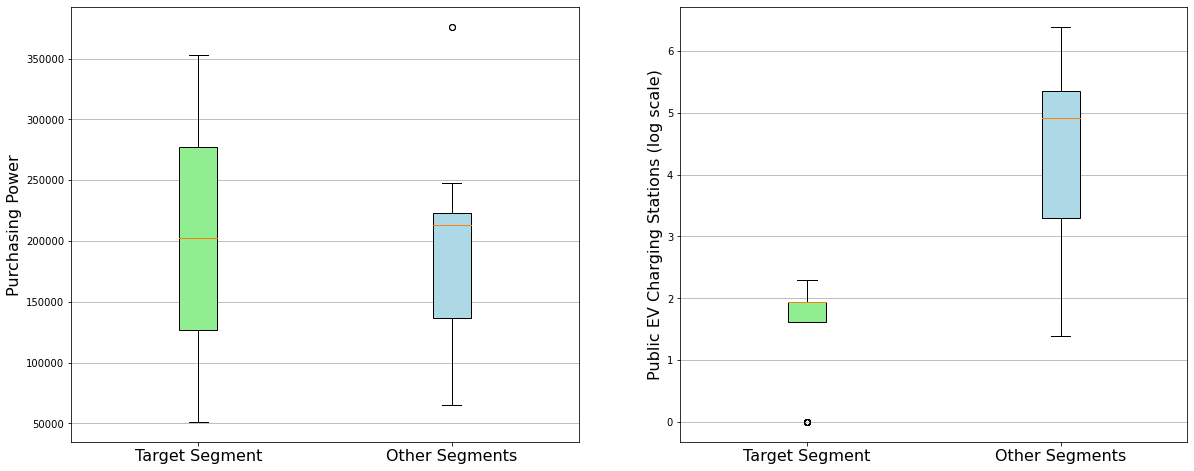

In [145]:
# Creating boxplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
labels = ['Target Segment', 'Other Segments']
bplot1 = ax1.boxplot(income, patch_artist=True, labels = labels)
bplot2 = ax2.boxplot(stations, patch_artist=True, labels = labels)
colors = ['lightgreen', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in (ax1, ax2):
    ax.yaxis.grid(True)
    ax.set_xticklabels(labels=labels, Fontsize=16)
ax1.set_ylabel('Purchasing Power', FontSize =16)
ax2.set_ylabel('Public EV Charging Stations (log scale)', FontSize =16)
# show plot
plt.show()

Based on the boxplot, segment members have comparatively lower general income and hence lower purchasing power so the price of the EV M-CYCLE/Scooter should be kept lower. Assuming that the average buyer intends to spend 20% of their annual income on EV M-CYCLE/Scooter, also adding our startup's opportunity cost of 100% of the purchasing power we can estimate the price to be 202130*.2*(1+1)= 80852.0 Rs